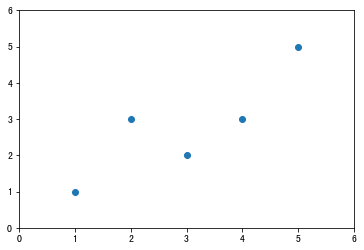

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1.,2.,3.,4.,5.])
y = np.array([1.,3.,2.,3.,5,])

plt.scatter(x,y)
plt.axis([0,6,0,6])
plt.show()

In [3]:
x_mean = np.mean(x)
y_mean = np.mean(y)

num = 0.0
d = 0.0
for x_i,y_i in zip(x,y):
    num = num + (x_i - x_mean) * (y_i - y_mean)
    d = d + (x_i - x_mean) ** 2
a = num / d
b = y_mean - a * x_mean

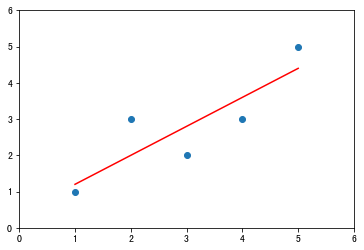

In [4]:
y_hat = a * x + b

plt.scatter(x,y)    # 绘制散点图
plt.plot(x,y_hat,color='r')    # 绘制直线
plt.axis([0,6,0,6])
plt.show()

In [5]:
x_predict = 6
y_predict = a * x_predict + b
print(y_predict)

5.2


In [6]:
# a的分子num、分母d
num = 0.0
d = 0.0
for x_i,y_i in zip(x,y):   # zip函数打包成[(x_i,y_i)...]的形式
    num = num + (x_i - x_mean) * (y_i - y_mean)
    d = d + (x_i - x_mean) ** 2
a = num / d

In [8]:
import time

a = np.random.rand(1000000)
b = np.random.rand(1000000)

tic = time.time()
c = np.dot(a, b)
toc = time.time()
print("c: %f" % c)
print("vectorized version:" + str(1000*(toc-tic)) + "ms")

c = 0
tic = time.time()
for i in range(1000000):
    c += a[i] * b[i]
toc = time.time()
print("c: %f" % c)
print("for loop:" + str(1000*(toc-tic)) + "ms")

c: 250119.618792
vectorized version:2.9947757720947266ms
c: 250119.618792
for loop:407.9563617706299ms


In [9]:
import numpy as np

class SimpleLinearRegression:
    def __init__(self):
        """模型初始化函数"""
        self.a_ = None
        self.b_ = None

    def fit(self, x_train, y_train):
        """根据训练数据集x_train,y_train训练模型"""
        assert x_train.ndim ==1, \
            "简单线性回归模型仅能够处理一维特征向量"
        assert len(x_train) == len(y_train), \
            "特征向量的长度和标签的长度相同"
        x_mean = np.mean(x_train)
        y_mean = np.mean(y_train)
        num = (x_train - x_mean).dot(y_train - y_mean)  # 分子
        d = (x_train - x_mean).dot(x_train - x_mean)    # 分母
        self.a_ = num / d
        self.b_ = y_mean - self.a_ * x_mean

        return self

    def predict(self, x_predict):
        """给定待预测数据集x_predict，返回表示x_predict的结果向量"""
        assert x_predict.ndim == 1, \
            "简单线性回归模型仅能够处理一维特征向量"
        assert self.a_ is not None and self.b_ is not None, \
            "先训练之后才能预测"
        return np.array([self._predict(x) for x in x_predict])

    def _predict(self, x_single):
        """给定单个待预测数据x_single，返回x_single的预测结果值"""
        return self.a_ * x_single + self.b_

    def __repr__(self):
        """返回一个可以用来表示对象的可打印字符串"""
        return "SimpleLinearRegression()"

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

boston = datasets.load_boston()

X = boston.data
y = boston.target

X = X[y<50.0]
y = y[y<50.0]



X.shape


(490, 13)

In [15]:
y.shape

(490,)

In [ ]:
from myAlgorithm.model_selection import train_test_split
from myAlgorithm.LinearRegression import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, seed = 666)

reg = LinearRegression()
reg.fit_normal(X_train, y_train)

reg.coef_

In [ ]:
reg.interception_

In [ ]:
reg.score(X_test, y_test)